In [10]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt
from matplotlib import 

In [2]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies').text
    soup = bs.BeautifulSoup(resp, 'lxml')
#     table= soup.find('table', {'class': 'wikitable sortable'})
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find('td').text.replace('\n','')
        mapping = str.maketrans(".", "-")
        ticker = ticker.translate(mapping)
        tickers.append(ticker)
        
    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
#     print(tickers)
    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA

In [3]:
def yahoo_data(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2020, 2, 11)
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

In [4]:
yahoo_data()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ARNC
ANET
AJG
AIZ
ATO
T
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK-B
BBY
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF-B
CHRW
COG
CDNS
CPB
COF
CPRI
CAH
KMX
CCL
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HRB
HAL
HBI
HOG
HIG
HAS
HCA
PEAK
HP
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRL
HST
H

In [9]:
def compile_data():
    with open("sp500tickers.pickle", 'rb') as f:
        tickers = pickle.load(f)
    mains_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace = True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)
        
        if mains_df.empty:
            mains_df = df
        else:
            mains_df = mains_df.join(df, how='outer')
            
        if count %15 == 0:
            print(count)
        
        print(mains_df.head())
        mains_df.to_csv('sp500_joined_closes.csv')
        
compile_data()

0
                  MMM
Date                 
2000-01-03  26.585411
2000-01-04  25.529045
2000-01-05  26.268497
2000-01-06  28.381254
2000-01-07  28.944662
                  MMM       ABT
Date                           
2000-01-03  26.585411  6.592210
2000-01-04  25.529045  6.403859
2000-01-05  26.268497  6.392088
2000-01-06  28.381254  6.615753
2000-01-07  28.944662  6.686383
                  MMM       ABT  ABBV
Date                                 
2000-01-03  26.585411  6.592210   NaN
2000-01-04  25.529045  6.403859   NaN
2000-01-05  26.268497  6.392088   NaN
2000-01-06  28.381254  6.615753   NaN
2000-01-07  28.944662  6.686383   NaN
                  MMM       ABT  ABBV      ABMD
Date                                           
2000-01-03  26.585411  6.592210   NaN  18.25000
2000-01-04  25.529045  6.403859   NaN  17.81250
2000-01-05  26.268497  6.392088   NaN  18.00000
2000-01-06  28.381254  6.615753   NaN  18.03125
2000-01-07  28.944662  6.686383   NaN  17.93750
                  

15
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES       AFL          A        APD     AKAM  \
Date                                                                          
2000-01-03  15.500  NaN  28.582153  5.408165  44.406895  18.222282  321.250   
2000-01-04  14.625  NaN  27.448732  5.264650  41.014706  17.666933  300.000   
2000-01-05  15.000  NaN  27.744410  5.234437  38.470551  17.771055  283.500   
2000-01-06  16.000  NaN  27.966164  5.340185  37.005753  18.95

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        APD     AKAM       ALK  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...  18.222282  321.250  7.756776   
2000-01-04  14.625  NaN  27.448732  ...  17.666933  300.000  7.659818   
2000-01-05  15.000  NaN  27.744410  ...  17.771055  283.500  7.701371   
2000-01-06  16.000  NaN  27.966164  ...  18.951166  236.125  7.708298   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  ALGN  ALLE        AGN  ADS       LNT  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...   NaN   NaN  29.479746  NaN  5.487643   
2000-01-04  14.625  NaN  27.448732  ...   NaN   NaN  28.532194  NaN  5.487643   
2000-01-05  15.000  NaN  27.744410  ...   NaN   NaN  29.058626  NaN  5.756267   
2000-01-06  16.000  NaN  27.966164  ...   NaN   NaN  29

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  GOOGL  GOOG        MO     AMZN  AMCR  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...    NaN   NaN  1.869759  89.3750   NaN   
2000-01-04  14.625  NaN  27.448732  ...    NaN   NaN  1.884717  81.9375   NaN   
2000-01-05  15.000  NaN  27.744410  ...    NaN   NaN  1.874745  69.7500   NaN   
2000-01-06  16.000  NaN  27.966164  ...    NaN   NaN  1

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  AAL        AEP        AXP  \
Date                                ...                              
2000-01-03  15.500  NaN  28.582153  ...  NaN  12.584994  34.386623   
2000-01-04  14.625  NaN  27.448732  ...  NaN  12.735111  33.088230   
2000-01-05  15.000  NaN  27.744410  ...  NaN  13.210492  32.364822   
2000-01-06  16.000  NaN  27.966164  ...  NaN  13.285550  33.024200   
2000-01-07  16.250  NaN  28.508238  ... 

45
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  AMP       ABC       AME       AMGN  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  NaN  3.008913  1.862015  51.560871   
2000-01-04  14.625  NaN  27.448732  ...  NaN  2.803487  1.855890  47.618286   
2000-01-05  15.000  NaN  27.744410  ...  NaN  3.020999  1.874265  49.256760   
2000-01-06  16.000  NaN  27.966164  ...  NaN  3.250594  1.8620

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        ADI      ANSS  ANTM        AON  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  30.784212  2.765625   NaN  27.678797   
2000-01-04  14.625  NaN  27.448732  ...  29.226831  2.687500   NaN  27.057795   
2000-01-05  15.000  NaN  27.744410  ...  29.653530  2.703125   NaN  27.856226   
2000-01-06  16.000  NaN  27.966164  ...  28.842848  2.7

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        AIV      AAPL       AMAT  APTV  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  14.077783  3.470226  24.176647   NaN   
2000-01-04  14.625  NaN  27.448732  ...  13.892554  3.177650  22.982153   NaN   
2000-01-05  15.000  NaN  27.744410  ...  14.031480  3.224152  22.122114   NaN   
2000-01-06  16.000  NaN  27.966164  ...  14.309334  2.9

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  ANET       AJG  AIZ       ATO  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...   NaN  7.812352  NaN  8.875327   
2000-01-04  14.625  NaN  27.448732  ...   NaN  7.459338  NaN  8.654135   
2000-01-05  15.000  NaN  27.744410  ...   NaN  7.490037  NaN  8.930626   
2000-01-06  16.000  NaN  27.966164  ...   NaN  7.476601  NaN  8.792377   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...      ADSK        ADP      AZO  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...  8.052903  27.044891  30.5625   
2000-01-04  14.625  NaN  27.448732  ...  7.660817  27.044891  30.4375   
2000-01-05  15.000  NaN  27.744410  ...  7.178246  26.784849  30.3125   
2000-01-06  16.000  NaN  27.966164  ...  6.740915  27.142429  29.0625   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        BKR       BLL        BAC  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  10.650946  0.870925  12.042428   
2000-01-04  14.625  NaN  27.448732  ...  10.650946  0.842214  11.327658   
2000-01-05  15.000  NaN  27.744410  ...  10.716685  0.857253  11.451962   
2000-01-06  16.000  NaN  27.966164  ...  11.735753  0.870925  12.430897   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        BDX      BRK-B        BBY  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  19.152721  35.299999  18.317701   
2000-01-04  14.625  NaN  27.448732  ...  18.649910  34.080002  18.198761   
2000-01-05  15.000  NaN  27.744410  ...  18.787033  34.639999  18.079815   
2000-01-06  16.000  NaN  27.966164  ...  19.564106  36.080002  17.921211   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...         BA     BKNG       BWA  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...  25.894598  307.500  2.305683   
2000-01-04  14.625  NaN  27.448732  ...  25.854326  324.000  2.305683   
2000-01-05  15.000  NaN  27.744410  ...  27.465197  359.625  2.316857   
2000-01-06  16.000  NaN  27.966164  ...  27.747078  345.000  2.287059   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  AVGO  BR      BF-B      CHRW  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...   NaN NaN  1.059199  6.905106   
2000-01-04  14.625  NaN  27.448732  ...   NaN NaN  1.039669  6.673462   
2000-01-05  15.000  NaN  27.744410  ...   NaN NaN  1.047711  6.585218   
2000-01-06  16.000  NaN  27.966164  ...   NaN NaN  1.054604  6.618310   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        CPB        COF  CPRI  \
Date                                ...                               
2000-01-03  15.500  NaN  28.582153  ...  21.002398  36.384857   NaN   
2000-01-04  14.625  NaN  27.448732  ...  20.227137  34.120029   NaN   
2000-01-05  15.000  NaN  27.744410  ...  20.177488  33.332291   NaN   
2000-01-06  16.000  NaN  27.966164  ...  20.603029  34.858574   NaN   
2000-01-07  16.250  NaN  28.508238

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        CAT  CBOE  CBRE  CDW  CE  CNC  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  11.954136   NaN   NaN  NaN NaN  NaN   
2000-01-04  14.625  NaN  27.448732  ...  11.800486   NaN   NaN  NaN NaN  NaN   
2000-01-05  15.000  NaN  27.744410  ...  12.077062   NaN   NaN  NaN NaN  NaN   
2000-01-06  16.000  NaN  27.966164  ...  12.691669   NaN   N

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       CNP        CTL      CERN  CF  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.582153  ...  6.199914  16.428341  2.535390 NaN   
2000-01-04  14.625  NaN  27.448732  ...  6.269573  15.770289  2.488869 NaN   
2000-01-05  15.000  NaN  27.744410  ...  6.530806  15.883747  2.488869 NaN   
2000-01-06  16.000  NaN  27.966164  ...  6.565641  15.702214  2.473362

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        CVX  CMG        CB       CHD  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  17.623112  NaN  7.381214  2.046016   
2000-01-04  14.625  NaN  27.448732  ...  17.623112  NaN  7.324653  1.996833   
2000-01-05  15.000  NaN  27.744410  ...  17.939219  NaN  6.900446  1.996833   
2000-01-06  16.000  NaN  27.966164  ...  18.703146  NaN  7.268091

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       CINF       CTAS       CSCO  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  13.764668  27.019138  41.826363   
2000-01-04  14.625  NaN  27.448732  ...  13.750579  25.920277  39.479851   
2000-01-05  15.000  NaN  27.744410  ...  13.891465  26.211151  39.358891   
2000-01-06  16.000  NaN  27.966164  ...  13.976000  26.356592  38.705723   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       CTXS        CLX  CME        CMS  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  50.142258  28.785843  NaN  15.750587   
2000-01-04  14.625  NaN  27.448732  ...  47.671829  28.017733  NaN  15.950809   
2000-01-05  15.000  NaN  27.744410  ...  44.932354  28.749252  NaN  16.384617   
2000-01-06  16.000  NaN  27.966164  ...  41.092190  29.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...      CTSH         CL      CMCSA  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  1.936630  15.509723  12.518080   
2000-01-04  14.625  NaN  27.448732  ...  1.871067  15.104843  11.580894   
2000-01-05  15.000  NaN  27.744410  ...  1.974455  14.590972  11.279660   
2000-01-06  16.000  NaN  27.966164  ...  1.873589  14.559831  11.714780   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  CXO       COP         ED       STZ  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  NaN  6.944692  13.009391  5.863564   
2000-01-04  14.625  NaN  27.448732  ...  NaN  6.810588  13.178033  5.642853   
2000-01-05  15.000  NaN  27.744410  ...  NaN  6.686062  13.780317  5.834136   
2000-01-06  16.000  NaN  27.966164  ...  NaN  6.915956  13.804408

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        GLW  CTVA       COST  COTY  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.582153  ...  31.220701   NaN  32.449142   NaN   
2000-01-04  14.625  NaN  27.448732  ...  28.193146   NaN  30.671743   NaN   
2000-01-05  15.000  NaN  27.744410  ...  27.552385   NaN  31.195852   NaN   
2000-01-06  16.000  NaN  27.966164  ...  26.911633   NaN  31.822483   NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       CSX       CMI        CVS  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...  3.513723  4.236246  13.948238   
2000-01-04  14.625  NaN  27.448732  ...  3.407247  4.118729  13.832964   
2000-01-05  15.000  NaN  27.744410  ...  3.478230  4.124323  14.593783   
2000-01-06  16.000  NaN  27.966164  ...  3.634396  4.269823  13.556309   
2000-01-07  16.2

150
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       DVA         DE  DAL      XRAY  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  2.291667  12.095335  NaN  6.974594   
2000-01-04  14.625  NaN  27.448732  ...  2.250000  12.077707  NaN  6.974594   
2000-01-05  15.000  NaN  27.744410  ...  2.062500  12.359811  NaN  7.095168   
2000-01-06  16.000  NaN  27.966164  ...  2.000000  12.994555 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  DLR  DFS  DISCA  DISCK       DISH  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.582153  ...  NaN  NaN    NaN    NaN  33.913342   
2000-01-04  14.625  NaN  27.448732  ...  NaN  NaN    NaN    NaN  32.666359   
2000-01-05  15.000  NaN  27.744410  ...  NaN  NaN    NaN    NaN  32.555019   
2000-01-06  16.000  NaN  27.966164  ...  NaN  NaN    NaN    NaN  29.28

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       DLTR         D        DOV  DOW  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  10.861111  6.047919  17.131346  NaN   
2000-01-04  14.625  NaN  27.448732  ...  10.847222  6.196636  16.814095  NaN   
2000-01-05  15.000  NaN  27.744410  ...  10.861111  6.365187  16.887302  NaN   
2000-01-06  16.000  NaN  27.966164  ...  11.055555  6.434587

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        DUK       DRE         DD  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  22.227282  6.141090  38.211967   
2000-01-04  14.625  NaN  27.448732  ...  22.572769  6.100689  37.167519   
2000-01-05  15.000  NaN  27.744410  ...  23.494127  6.120891  38.374023   
2000-01-06  16.000  NaN  27.966164  ...  24.127544  6.262297  39.454472   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       EMN       ETN      EBAY  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...  7.899222  4.554770  7.320513   
2000-01-04  14.625  NaN  27.448732  ...  7.707860  4.399222  6.633810   
2000-01-05  15.000  NaN  27.744410  ...  8.090594  4.435117  7.077576   
2000-01-06  16.000  NaN  27.966164  ...  8.600911  4.526849  6.990118   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  EW         EA        EMR        ETR  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ... NaN  25.265625  13.378034  11.592144   
2000-01-04  14.625  NaN  27.448732  ... NaN  22.343750  13.218252  11.620837   
2000-01-05  15.000  NaN  27.744410  ... NaN  22.328125  13.465183  12.108624   
2000-01-06  16.000  NaN  27.966164  ... NaN  20.000000  13.8

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        EFX  EQIX       EQR        ESS  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  10.965322   NaN  7.071433  15.365993   
2000-01-04  14.625  NaN  27.448732  ...  10.597770   NaN  7.019051  15.193007   
2000-01-05  15.000  NaN  27.744410  ...  10.475251   NaN  7.165718  15.135358   
2000-01-06  16.000  NaN  27.966164  ...  10.352736   Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...         ES         RE       EXC  EXPE  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  10.904125  15.848392  8.021944   NaN   
2000-01-04  14.625  NaN  27.448732  ...  10.904125  15.803109  7.962736   NaN   
2000-01-05  15.000  NaN  27.744410  ...  10.970016  16.844580  8.347555   NaN   
2000-01-06  16.000  NaN  27.966164  ...  11.101787  17.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        XOM      FFIV  FB      FAST  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.582153  ...  21.549223  59.75000 NaN  1.864844   
2000-01-04  14.625  NaN  27.448732  ...  21.136469  58.96875 NaN  1.757732   
2000-01-05  15.000  NaN  27.744410  ...  22.288738  55.40625 NaN  1.831887   
2000-01-06  16.000  NaN  27.966164  ...  23.441015  51.06250 NaN  1.83

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  FIS       FITB        FE  FRC  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...  NaN  27.947844  8.898097  NaN   
2000-01-04  14.625  NaN  27.448732  ...  NaN  26.772942  8.898097  NaN   
2000-01-05  15.000  NaN  27.744410  ...  NaN  26.372965  9.225788  NaN   
2000-01-06  16.000  NaN  27.966164  ...  NaN  27.297897  9.251000  NaN   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...      FLIR       FLS       FMC  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...  1.861800  3.999768  4.798979   
2000-01-04  14.625  NaN  27.448732  ...  1.715913  3.923728  4.738992   
2000-01-05  15.000  NaN  27.744410  ...  1.806224  3.984561  4.826246   
2000-01-06  16.000  NaN  27.966164  ...  1.792330  3.999768  4.820791   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  FBHS  FOXA  FOX       BEN       FCX  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...   NaN   NaN  NaN  6.448839  5.760734   
2000-01-04  14.625  NaN  27.448732  ...   NaN   NaN  NaN  6.334362  5.437866   
2000-01-05  15.000  NaN  27.744410  ...   NaN   NaN  NaN  6.436121  5.641784   
2000-01-06  16.000  NaN  27.966164  ...   NaN   NaN  NaN  6.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  GRMN      IT         GD         GE  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...   NaN  16.625  14.730954  25.559582   
2000-01-04  14.625  NaN  27.448732  ...   NaN  15.375  15.350218  24.537212   
2000-01-05  15.000  NaN  27.744410  ...   NaN  14.750  16.401087  24.494610   
2000-01-06  16.000  NaN  27.966164  ...   NaN  14.750  16.457382 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        GPC      GILD        GL  GPN  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  12.324387  1.541514  8.742205  NaN   
2000-01-04  14.625  NaN  27.448732  ...  12.196329  1.471368  8.568523  NaN   
2000-01-05  15.000  NaN  27.744410  ...  12.132313  1.459391  8.631511  NaN   
2000-01-06  16.000  NaN  27.966164  ...  12.132313  1.558623  8.6

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       HRB        HAL  HBI        HOG  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  4.750762  12.458887  NaN  21.732521   
2000-01-04  14.625  NaN  27.448732  ...  4.622940  12.519852  NaN  21.297436   
2000-01-05  15.000  NaN  27.744410  ...  5.056118  11.971091  NaN  21.145159   
2000-01-06  16.000  NaN  27.966164  ...  5.006410  12.458887

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  HCA      PEAK        HP      HSIC  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.582153  ...  NaN  1.835411  4.669496  2.475490   
2000-01-04  14.625  NaN  27.448732  ...  NaN  1.830619  4.527997  2.352941   
2000-01-05  15.000  NaN  27.744410  ...  NaN  1.864164  4.527997  2.500000   
2000-01-06  16.000  NaN  27.966164  ...  NaN  1.931254  4.796848  2.48

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  HPE  HLT       HFC      HOLX  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...  NaN  NaN  0.083904  1.500000   
2000-01-04  14.625  NaN  27.448732  ...  NaN  NaN  0.084674  1.421875   
2000-01-05  15.000  NaN  27.744410  ...  NaN  NaN  0.085829  1.500000   
2000-01-06  16.000  NaN  27.966164  ...  NaN  NaN  0.084674  1.484375   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        HON       HRL       HST  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...  33.472942  1.651222  4.390128   
2000-01-04  14.625  NaN  27.448732  ...  32.882473  1.628145  4.357610   
2000-01-05  15.000  NaN  27.744410  ...  32.439613  1.653786  4.195011   
2000-01-06  16.000  NaN  27.966164  ...  33.066990  1.681991  4.260049   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  HII       IEX      IDXX  INFO  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...  NaN  8.690067  4.015625   NaN   
2000-01-04  14.625  NaN  27.448732  ...  NaN  8.294252  3.656250   NaN   
2000-01-05  15.000  NaN  27.744410  ...  NaN  8.258267  3.765625   NaN   
2000-01-06  16.000  NaN  27.966164  ...  NaN  8.258267  3.750000   NaN   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...         IR       INTC  ICE        IBM  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  12.840148  27.876417  NaN  75.621590   
2000-01-04  14.625  NaN  27.448732  ...  12.582741  26.574726  NaN  73.054688   
2000-01-05  15.000  NaN  27.744410  ...  12.567599  26.795017  NaN  75.621590   
2000-01-06  16.000  NaN  27.966164  ...  13.248976  25.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        IPG        IFF       INTU  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  40.791092  22.938547  27.514559   
2000-01-04  14.625  NaN  27.448732  ...  37.552204  22.656343  27.799986   
2000-01-05  15.000  NaN  27.744410  ...  36.707283  22.857927  35.820305   
2000-01-06  16.000  NaN  27.966164  ...  36.801178  23.382002  31.967134   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  IQV       IRM       JKHY         J  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  NaN  5.117852  10.664424  7.745116   
2000-01-04  14.625  NaN  27.448732  ...  NaN  4.956520   9.796388  7.699645   
2000-01-05  15.000  NaN  27.744410  ...  NaN  4.795186   9.994802  7.745116   
2000-01-06  16.000  NaN  27.966164  ...  NaN  4.750370   9.895594

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        SJM        JNJ        JCI  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  10.576149  27.137581  28.381853   
2000-01-04  14.625  NaN  27.448732  ...  10.437901  26.144068  26.979139   
2000-01-05  15.000  NaN  27.744410  ...  10.368777  26.420055  26.558319   
2000-01-06  16.000  NaN  27.966164  ...  10.576149  27.247986  26.277784   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        KSU          K        KEY  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  65.977760  16.403088  10.810666   
2000-01-04  14.625  NaN  27.448732  ...  62.585308  15.819722  10.680420   
2000-01-05  15.000  NaN  27.744410  ...  60.655113  15.682451  10.485046   
2000-01-06  16.000  NaN  27.966164  ...  62.585308  15.819722  10.875791   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  KMI       KLAC        KSS  KHC  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  NaN  30.664957  24.588659  NaN   
2000-01-04  14.625  NaN  27.448732  ...  NaN  29.357819  24.296469  NaN   
2000-01-05  15.000  NaN  27.744410  ...  NaN  27.891689  24.633608  NaN   
2000-01-06  16.000  NaN  27.966164  ...  NaN  28.103664  25.420269  NaN   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       LHX       LH       LRCX  LW  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.582153  ...  8.325203  9.06250  34.180763 NaN   
2000-01-04  14.625  NaN  27.448732  ...  8.004228  8.75000  32.697948 NaN   
2000-01-05  15.000  NaN  27.744410  ...  7.923987  8.75000  32.222687 NaN   
2000-01-06  16.000  NaN  27.966164  ...  7.863804  8.59375  31.994560 NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  LDOS       LEN        LLY        LNC  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...   NaN  5.995893  34.825264  24.672104   
2000-01-04  14.625  NaN  27.448732  ...   NaN  5.948866  33.729710  23.961544   
2000-01-05  15.000  NaN  27.744410  ...   NaN  5.972381  34.161278  23.132566   
2000-01-06  16.000  NaN  27.966164  ...   NaN  5.972381

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  LKQ        LMT         L        LOW  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  NaN  12.220462  6.839721  10.577620   
2000-01-04  14.625  NaN  27.448732  ...  NaN  12.635356  6.796293  10.008420   
2000-01-05  15.000  NaN  27.744410  ...  NaN  12.710787  6.752868   9.996562   
2000-01-06  16.000  NaN  27.966164  ...  NaN  12.899378  6.7

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...          M       MRO  MPC  MKTX  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  15.633248  2.410430  NaN   NaN   
2000-01-04  14.625  NaN  27.448732  ...  15.187135  2.317245  NaN   NaN   
2000-01-05  15.000  NaN  27.744410  ...  15.478079  2.379368  NaN   NaN   
2000-01-06  16.000  NaN  27.966164  ...  15.342307  2.634079  NaN   NaN   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        MMC        MLM        MAS  MA  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  27.131832  30.616978  13.041507 NaN   
2000-01-04  14.625  NaN  27.448732  ...  25.912422  30.191736  12.717899 NaN   
2000-01-05  15.000  NaN  27.744410  ...  24.979942  31.750927  12.203245 NaN   
2000-01-06  16.000  NaN  27.966164  ...  26.799160  34.11337

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        MCD        MCK        MDT  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  23.966759  20.010729  25.099554   
2000-01-04  14.625  NaN  27.448732  ...  23.475336  18.730047  25.282776   
2000-01-05  15.000  NaN  27.744410  ...  23.853352  18.943489  26.871201   
2000-01-06  16.000  NaN  27.966164  ...  23.513132  20.277544  27.879999   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        MGM       MCHP        MU  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  11.002934  12.278507  37.96875   
2000-01-04  14.625  NaN  27.448732  ...  10.901054  11.397443  36.50000   
2000-01-05  15.000  NaN  27.744410  ...  10.726402  11.487805  36.37500   
2000-01-06  16.000  NaN  27.966164  ...  11.119368  11.182821  37.00000   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...      MHK        TAP  MDLZ      MNST  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  24.5625  14.954867   NaN  0.089844   
2000-01-04  14.625  NaN  27.448732  ...  24.0000  14.770468   NaN  0.085938   
2000-01-05  15.000  NaN  27.744410  ...  24.4375  15.471187   NaN  0.085938   
2000-01-06  16.000  NaN  27.966164  ...  24.3125  15.286783   NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        MOS         MSI  MSCI  \
Date                                ...                                
2000-01-03  15.500  NaN  28.582153  ...  13.238464  147.053482   NaN   
2000-01-04  14.625  NaN  27.448732  ...  12.942082  136.073807   NaN   
2000-01-05  15.000  NaN  27.744410  ...  13.436059  132.496201   NaN   
2000-01-06  16.000  NaN  27.966164  ...  13.633647  117.445381   NaN   
2000-01-07  16.250  NaN  28.

345
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       NTAP  NFLX        NWL  \
Date                                ...                               
2000-01-03  15.500  NaN  28.582153  ...  36.784023   NaN  15.428966   
2000-01-04  14.625  NaN  27.448732  ...  32.131927   NaN  15.811219   
2000-01-05  15.000  NaN  27.744410  ...  33.917027   NaN  15.567971   
2000-01-06  16.000  NaN  27.966164  ...  30.319769   NaN  15.880716   
2000-01-07  16.250  NaN  28.50

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       NEE  NLSN       NKE        NI  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  8.366345   NaN  1.824645  0.922950   
2000-01-04  14.625  NaN  27.448732  ...  8.518459   NaN  1.725119  0.932769   
2000-01-05  15.000  NaN  27.744410  ...  8.797340   NaN  1.824645  0.972043   
2000-01-06  16.000  NaN  27.966164  ...  8.797340   NaN  1.815166

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        NSC       NTRS        NOC  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  12.810361  34.399174  13.710448   
2000-01-04  14.625  NaN  27.448732  ...  12.889924  32.162697  13.888718   
2000-01-05  15.000  NaN  27.744410  ...  12.810361  32.886887  13.872504   
2000-01-06  16.000  NaN  27.966164  ...  13.566249  33.568478  13.613206   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       NUE      NVDA      NVR  \
Date                                ...                                
2000-01-03  15.500  NaN  28.582153  ...  6.395348  3.592586  46.5625   
2000-01-04  14.625  NaN  27.448732  ...  6.329112  3.496655  46.0000   
2000-01-05  15.000  NaN  27.744410  ...  6.505738  3.381539  45.8750   
2000-01-06  16.000  NaN  27.966164  ...  6.564613  3.160900  45.8750   
2000-01-07  16.250  NaN  28.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...      ODFL        OMC       OKE  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...  1.462388  30.249611  1.137284   
2000-01-04  14.625  NaN  27.448732  ...  1.429891  29.254303  1.122960   
2000-01-05  15.000  NaN  27.744410  ...  1.608627  28.415121  1.134419   
2000-01-06  16.000  NaN  27.966164  ...  1.462388  28.571236  1.134419   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...         PH       PAYX  PAYC  PYPL  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.582153  ...  21.781553  15.103735   NaN   NaN   
2000-01-04  14.625  NaN  27.448732  ...  20.916981  13.970957   NaN   NaN   
2000-01-05  15.000  NaN  27.744410  ...  20.916981  14.796942   NaN   NaN   
2000-01-06  16.000  NaN  27.966164  ...  21.307428  15.339725   NaN   NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        PEP        PKI      PRGO  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  22.625731  16.261370  7.172835   
2000-01-04  14.625  NaN  27.448732  ...  22.050493  15.501043  7.117663   
2000-01-05  15.000  NaN  27.744410  ...  21.513603  15.329362  7.117663   
2000-01-06  16.000  NaN  27.966164  ...  22.472326  15.525561  7.172835   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        PNW       PXD        PNC  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  12.229779  8.039665  23.572252   
2000-01-04  14.625  NaN  27.448732  ...  12.383937  8.158772  22.838911   
2000-01-05  15.000  NaN  27.744410  ...  12.717943  7.920563  22.943668   
2000-01-06  16.000  NaN  27.966164  ...  12.795023  8.099220  24.026251   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...         PG       PGR       PLD  PRU  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  28.580601  3.410009  8.764339  NaN   
2000-01-04  14.625  NaN  27.448732  ...  28.030664  3.286394  8.626103  NaN   
2000-01-05  15.000  NaN  27.744410  ...  27.497383  3.364784  8.515511  NaN   
2000-01-06  16.000  NaN  27.966164  ...  28.763931  3.352725  8.6

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        PSA       PHM       PVH  QRVO  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  11.108811  4.302984  7.066137   NaN   
2000-01-04  14.625  NaN  27.448732  ...  11.108811  4.099295  6.783493   NaN   
2000-01-05  15.000  NaN  27.744410  ...  11.200367  4.022910  6.670434   NaN   
2000-01-06  16.000  NaN  27.966164  ...  11.627636  3.997448

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       QCOM       DGX         RL  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  63.437000  5.894181  14.604629   
2000-01-04  14.625  NaN  27.448732  ...  57.334328  5.881899  14.028818   
2000-01-05  15.000  NaN  27.744410  ...  55.344299  5.832782  14.290557   
2000-01-06  16.000  NaN  27.966164  ...  49.551178  5.857342  14.290557   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...         O       REG     REGN  \
Date                                ...                                
2000-01-03  15.500  NaN  28.582153  ...  2.258706  7.701966  12.3125   
2000-01-04  14.625  NaN  27.448732  ...  2.231493  7.726110  12.0000   
2000-01-05  15.000  NaN  27.744410  ...  2.217885  7.677819  11.5000   
2000-01-06  16.000  NaN  27.966164  ...  2.245100  7.726110  11.6250   
2000-01-07  16.250  NaN  28.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       RMD        RHI        ROK  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  4.469048  10.609947  11.715097   
2000-01-04  14.625  NaN  27.448732  ...  4.448547  10.040288  11.285043   
2000-01-05  15.000  NaN  27.744410  ...  4.448547   9.850401  11.344368   
2000-01-06  16.000  NaN  27.966164  ...  4.455381   9.850401  11.121925   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...      ROST        RCL       SPGI  CRM  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  1.803910  32.681686  17.955013  NaN   
2000-01-04  14.625  NaN  27.448732  ...  1.726042  31.580555  17.129272  NaN   
2000-01-05  15.000  NaN  27.744410  ...  1.764976  33.518551  16.898834  NaN   
2000-01-06  16.000  NaN  27.966164  ...  1.576798  34.179218

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  STX        SEE       SRE  NOW  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...  NaN  19.783421  8.677881  NaN   
2000-01-04  14.625  NaN  27.448732  ...  NaN  20.541590  8.771864  NaN   
2000-01-05  15.000  NaN  27.744410  ...  NaN  20.541590  8.959837  NaN   
2000-01-06  16.000  NaN  27.966164  ...  NaN  21.086519  9.210457  NaN   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       SPG       SWKS        SLG  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  8.161086  28.864922  11.297783   
2000-01-04  14.625  NaN  27.448732  ...  8.070909  27.170368  11.134049   
2000-01-05  15.000  NaN  27.744410  ...  8.138542  27.874037  11.035809   
2000-01-06  16.000  NaN  27.966164  ...  8.341442  25.159874  11.232289   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       LUV        SWK      SBUX  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...  9.726440  17.403244  2.616962   
2000-01-04  14.625  NaN  27.448732  ...  9.458396  17.024912  2.534041   
2000-01-05  15.000  NaN  27.744410  ...  9.420102  16.797913  2.567210   
2000-01-06  16.000  NaN  27.966164  ...  9.381810  16.722246  2.660081   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        SYK       SIVB  SYF       SNPS  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  14.307736  26.500000  NaN  32.781250   
2000-01-04  14.625  NaN  27.448732  ...  14.150793  24.781250  NaN  30.437500   
2000-01-05  15.000  NaN  27.744410  ...  14.582375  23.968750  NaN  30.703125   
2000-01-06  16.000  NaN  27.966164  ...  14.896259  24.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       TROW      TTWO  TPR        TGT  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.582153  ...  11.104586  9.124436  NaN  24.826855   
2000-01-04  14.625  NaN  27.448732  ...  10.768691  8.874452  NaN  23.750237   
2000-01-05  15.000  NaN  27.744410  ...  10.748930  8.832788  NaN  23.211926   
2000-01-06  16.000  NaN  27.966164  ...  11.065073  8.749459

450
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        TFX        TXN        TXT  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.582153  ...  22.657223  36.860809  24.234592   
2000-01-04  14.625  NaN  27.448732  ...  22.158762  35.293209  23.830359   
2000-01-05  15.000  NaN  27.744410  ...  23.518204  34.442219  23.264408   
2000-01-06  16.000  NaN  27.966164  ...  23.518204  33.501659  22.961222   


                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       TJX      TSCO  TDG        TRV  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  1.210077  0.891589  NaN  19.751583   
2000-01-04  14.625  NaN  27.448732  ...  1.146781  0.872283  NaN  19.489717   
2000-01-05  15.000  NaN  27.744410  ...  1.113271  0.877549  NaN  19.340092   
2000-01-06  16.000  NaN  27.966164  ...  1.180291  0.863508  NaN 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        TSN       UDR  ULTA        USB  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  12.549051  3.474591   NaN  10.806476   
2000-01-04  14.625  NaN  27.448732  ...  12.500222  3.321620   NaN  10.412325   
2000-01-05  15.000  NaN  27.744410  ...  12.549051  3.387181   NaN  10.182398   
2000-01-06  16.000  NaN  27.966164  ...  12.646706  3.6

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       UNP  UAL       UNH        UPS  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.582153  ...  4.404412  NaN  5.672389  41.080872   
2000-01-04  14.625  NaN  27.448732  ...  4.398020  NaN  5.599835  39.779140   
2000-01-05  15.000  NaN  27.744410  ...  4.398020  NaN  5.586644  41.655167   
2000-01-06  16.000  NaN  27.966164  ...  4.666504  NaN  5.791113 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...        UTX       UHS        UNM  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  19.222689  8.220908  20.071714   
2000-01-04  14.625  NaN  27.448732  ...  18.434549  8.055387  19.701534   
2000-01-05  15.000  NaN  27.744410  ...  18.069328  8.386432  19.043449   
2000-01-06  16.000  NaN  27.966164  ...  18.934340  9.007134  19.454756   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       VAR       VTR        VRSN  VRSK  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  6.302719  1.584427  161.444855   NaN   
2000-01-04  14.625  NaN  27.448732  ...  6.261614  1.584427  159.958847   NaN   
2000-01-05  15.000  NaN  27.744410  ...  6.477414  1.559670  151.148895   NaN   
2000-01-06  16.000  NaN  27.966164  ...  6.494541  1.58

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  VIAC   V       VNO        VMC  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.582153  ...   NaN NaN  7.937211  28.592962   
2000-01-04  14.625  NaN  27.448732  ...   NaN NaN  7.937211  28.502188   
2000-01-05  15.000  NaN  27.744410  ...   NaN NaN  8.145302  30.408386   
2000-01-06  16.000  NaN  27.966164  ...   NaN NaN  8.249350  30.453777   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       WAB        WMT        WBA  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.582153  ...  7.887871  46.391357  21.168085   
2000-01-04  14.625  NaN  27.448732  ...  7.773141  44.655510  20.380644   
2000-01-05  15.000  NaN  27.744410  ...  7.744457  43.744167  20.612247   
2000-01-06  16.000  NaN  27.966164  ...  7.428942  44.221523  20.010086   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...       WAT       WEC       WFC  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.582153  ...  25.75000  3.418669  9.256950   
2000-01-04  14.625  NaN  27.448732  ...  24.50000  3.441088  8.798539   
2000-01-05  15.000  NaN  27.744410  ...  26.03125  3.598010  8.709811   
2000-01-06  16.000  NaN  27.966164  ...  25.25000  3.586801  9.094282   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.585411  6.592210   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.529045  6.403859   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.268497  6.392088   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.381254  6.615753   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  28.944662  6.686383   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...  WRK         WY        WHR        WMB  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.582153  ...  NaN  36.874073  37.448917  11.597153   
2000-01-04  14.625  NaN  27.448732  ...  NaN  35.488834  36.010048  11.339961   
2000-01-05  15.000  NaN  27.744410  ...  NaN  37.368816  36.540165  12.041398   
2000-01-06  16.000  NaN  27.966164  ...  NaN  39.116863

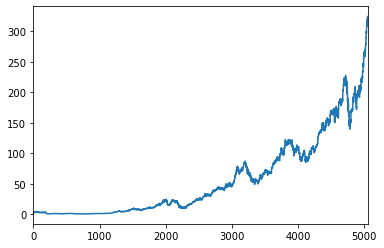

In [12]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
#     df['AAPL'].plot()
#     plt.show()
visualize_data()    